In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('D:/jyoti/BankChurnersdataset.csv')

# Display a sample of five rows of the data frame
sample_data = data.head(5)
print(sample_data)

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

In [4]:
data_shape = data.shape
print("Number of rows:", data_shape[0])
print("Number of columns:", data_shape[1])

Number of rows: 10127
Number of columns: 21


In [5]:
missing_percentage = (data.isnull().mean() * 100).round(2)
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


In [7]:
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print(duplicate_rows)

No duplicate rows found.


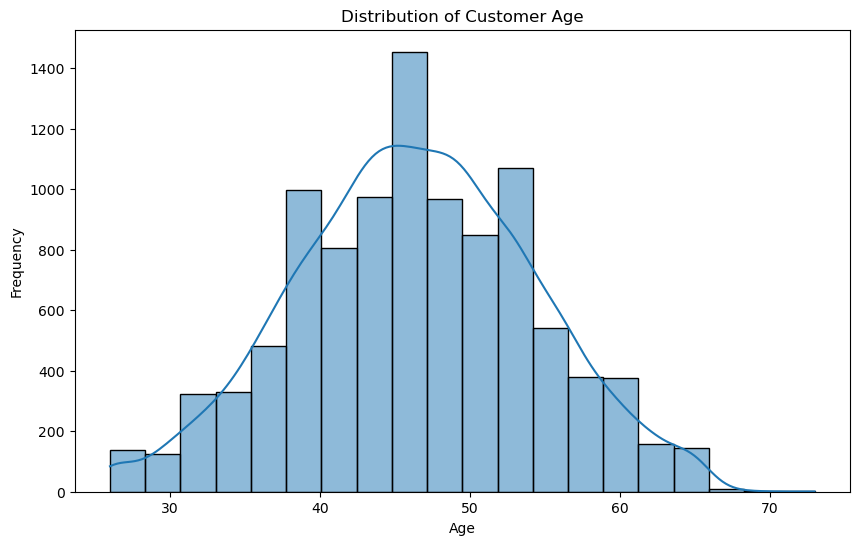

Mean Age: 46.33
Median Age: 46.00
Standard Deviation of Age: 8.02


In [8]:
customer_age = data['Customer_Age']

# Calculate mean, median, and standard deviation
mean_age = customer_age.mean()
median_age = customer_age.median()
std_dev_age = customer_age.std()

# Plot a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_age, kde=True, bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Print basic statistics
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Standard Deviation of Age: {std_dev_age:.2f}")

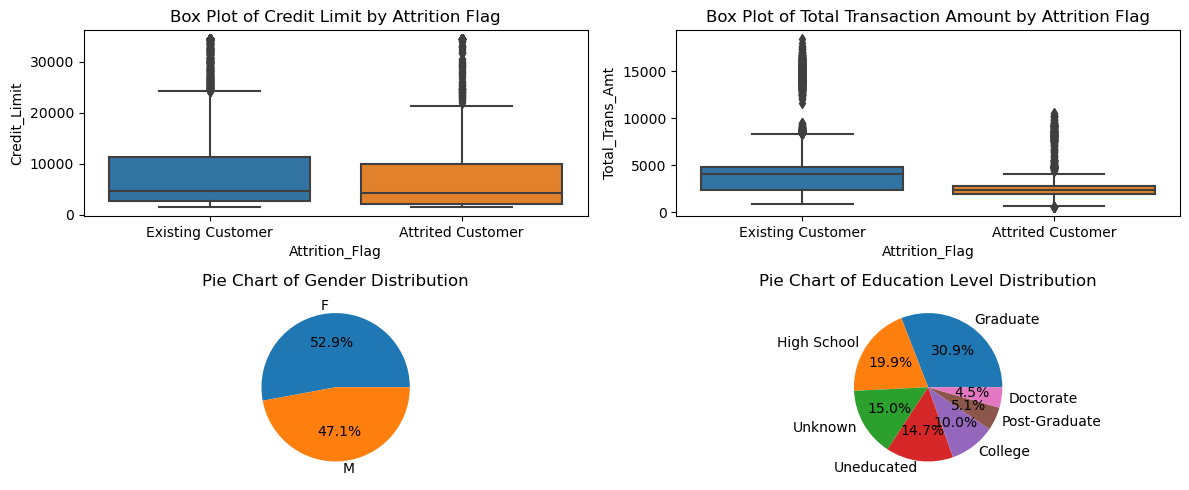

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='Attrition_Flag', y='Credit_Limit')
plt.title('Box Plot of Credit Limit by Attrition Flag')

# Box Plot 2: Total Transaction Amount
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='Attrition_Flag', y='Total_Trans_Amt')
plt.title('Box Plot of Total Transaction Amount by Attrition Flag')

# Pie Chart 1: Gender
plt.subplot(2, 2, 3)
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Gender Distribution')
plt.ylabel('')

# Pie Chart 2: Education Level
plt.subplot(2, 2, 4)
data['Education_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Education Level Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

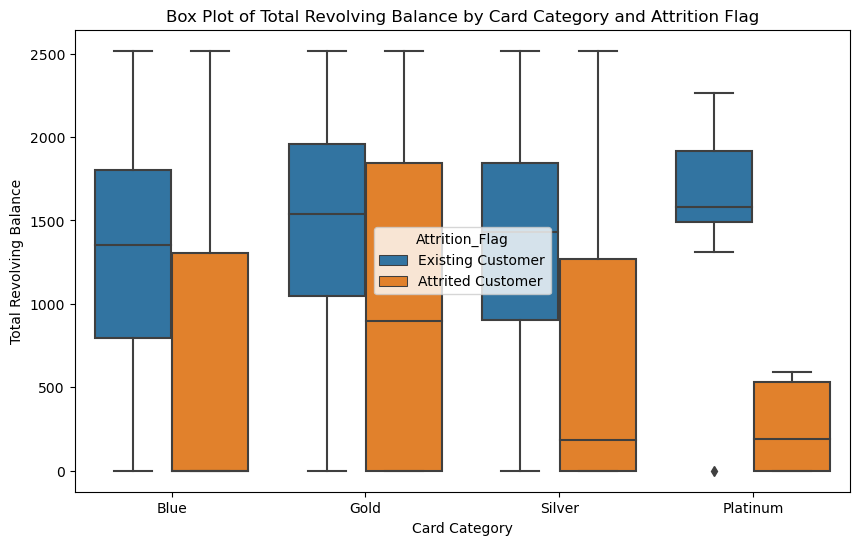

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Card_Category', y='Total_Revolving_Bal', hue='Attrition_Flag')
plt.title('Box Plot of Total Revolving Balance by Card Category and Attrition Flag')
plt.xlabel('Card Category')
plt.ylabel('Total Revolving Balance')

plt.show()

<Figure size 1000x600 with 0 Axes>

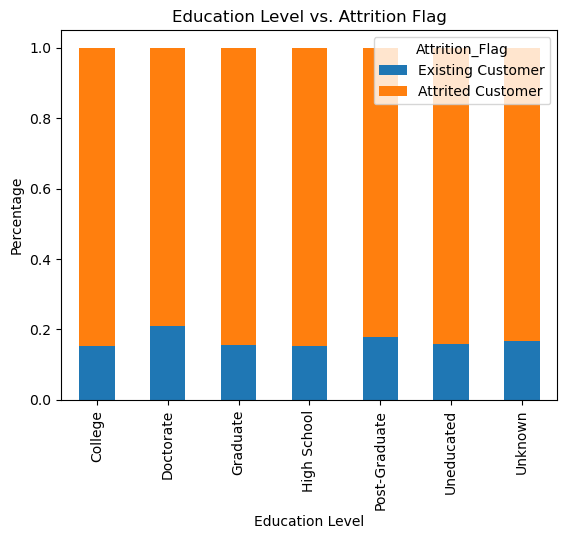

In [11]:
education_attrition = pd.crosstab(data['Education_Level'], data['Attrition_Flag'], normalize='index')

plt.figure(figsize=(10, 6))
education_attrition.plot(kind='bar', stacked=True)
plt.title('Education Level vs. Attrition Flag')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Attrition_Flag', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

<Figure size 1000x600 with 0 Axes>

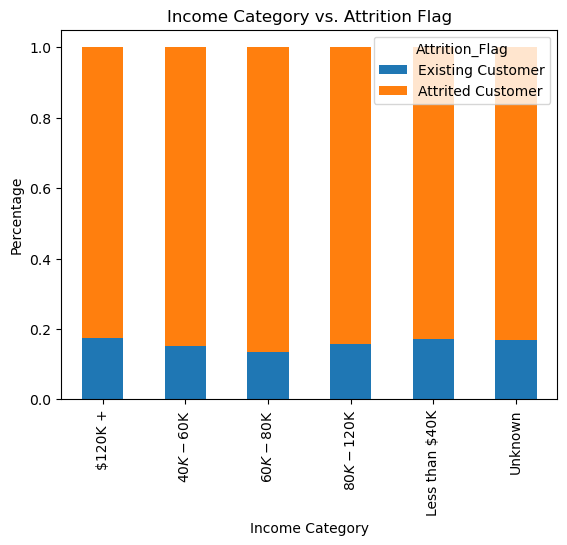

In [12]:
income_attrition = pd.crosstab(data['Income_Category'], data['Attrition_Flag'], normalize='index')

plt.figure(figsize=(10, 6))
income_attrition.plot(kind='bar', stacked=True)
plt.title('Income Category vs. Attrition Flag')
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.legend(title='Attrition_Flag', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

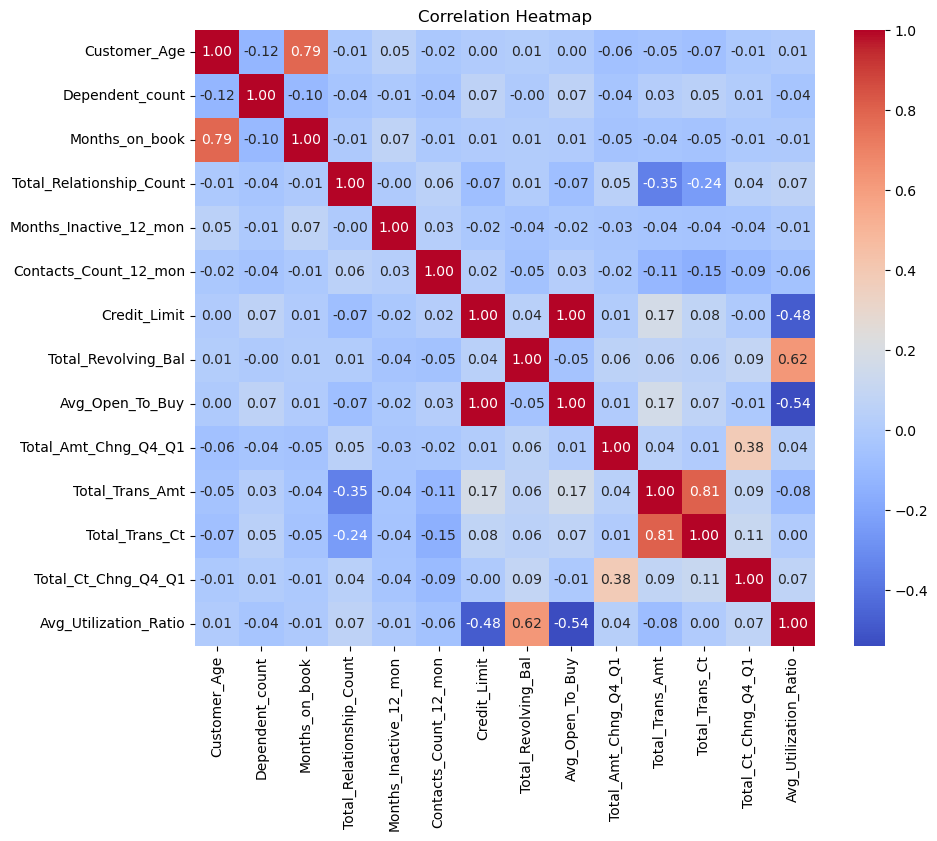

In [13]:
data.drop('CLIENTNUM', axis=1, inplace=True)

# Select numerical columns (int64 and float64) along with the Attrition_Flag column
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
correlation = numerical_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Outliers found in the Credit_Limit column:
          Attrition_Flag  Customer_Age Gender  Dependent_count  \
6      Existing Customer            51      M                4   
7      Existing Customer            32      M                0   
16     Existing Customer            48      M                4   
40     Existing Customer            45      M                3   
45     Existing Customer            49      M                4   
...                  ...           ...    ...              ...   
10098  Attrited Customer            55      M                3   
10100  Existing Customer            39      M                2   
10104  Existing Customer            51      M                3   
10110  Existing Customer            56      M                1   
10112  Attrited Customer            33      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
6             Unknown        Married         $120K +          Gold   
7         High School   

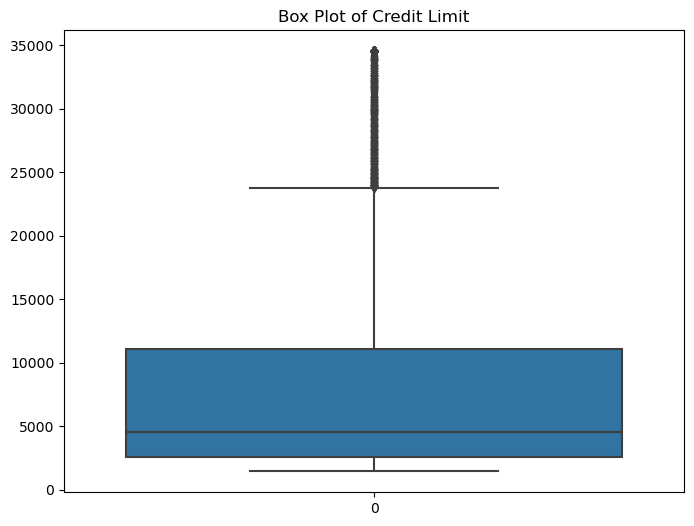

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['Credit_Limit'])
plt.title('Box Plot of Credit Limit')

# Check for outliers
q1 = data['Credit_Limit'].quantile(0.25)
q3 = data['Credit_Limit'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['Credit_Limit'] < lower_bound) | (data['Credit_Limit'] > upper_bound)]

if outliers.empty:
    print("No outliers found in the Credit_Limit column.")
else:
    print("Outliers found in the Credit_Limit column:")
    print(outliers)

plt.show()

In [17]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Standardize the numerical columns (int64 and float64)
numerical_data = data.select_dtypes(include=['int64', 'float64'])
data[numerical_data.columns] = (data[numerical_data.columns] - data[numerical_data.columns].mean()) / data[numerical_data.columns].std()